In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("salahuddinahmedshuvo/student-mental-stress-and-coping-mechanisms")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/salahuddinahmedshuvo/student-mental-stress-and-coping-mechanisms/versions/1


In [2]:
import pandas as pd

dataset_path = "/root/.cache/kagglehub/datasets/salahuddinahmedshuvo/student-mental-stress-and-coping-mechanisms/versions/1/Student_Mental_Stress_and_Coping_Mechanisms.csv"

df = pd.read_csv(dataset_path)
df.head()

,Student ID,Age,Gender,Academic Performance (GPA),Study Hours Per Week,Social Media Usage (Hours per day),Sleep Duration (Hours per night),Physical Exercise (Hours per week),Family Support,Financial Stress,Peer Pressure,Relationship Stress,Mental Stress Level,Counseling Attendance,Diet Quality,Stress Coping Mechanisms,Cognitive Distortions,Family Mental Health History,Medical Condition,Substance Use
0,802-17-3671,22,Female,2,9,2,12,2,1,1,3,5,9,No,1,Walking or Nature Walks,4,No,Yes,1
1,871-12-8572,25,Female,0,28,0,6,0,1,1,1,2,9,Yes,3,Meditation,2,Yes,No,1
2,495-13-2672,24,Female,0,45,3,12,10,3,3,1,4,9,Yes,5,Reading,1,Yes,Yes,3
3,365-77-2496,20,Male,2,8,7,7,4,1,3,2,5,1,No,1,Social Media Engagement,2,Yes,No,4
4,664-76-5622,28,Male,0,14,6,8,1,2,4,4,2,7,Yes,1,Exercise,1,Yes,No,3


In [3]:
df.columns

Index(['Student ID', 'Age', 'Gender', 'Academic Performance (GPA)',
       'Study Hours Per Week', 'Social Media Usage (Hours per day)',
       'Sleep Duration (Hours per night)',
       'Physical Exercise (Hours per week)', 'Family Support  ',
       'Financial Stress', 'Peer Pressure', 'Relationship Stress',
       'Mental Stress Level', 'Counseling Attendance', 'Diet Quality',
       'Stress Coping Mechanisms', 'Cognitive Distortions',
       'Family Mental Health History', 'Medical Condition', 'Substance Use'],
      dtype='object')

In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, mean_squared_error

In [17]:
imputer = SimpleImputer(strategy='mean')
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Encoding categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Feature scaling
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

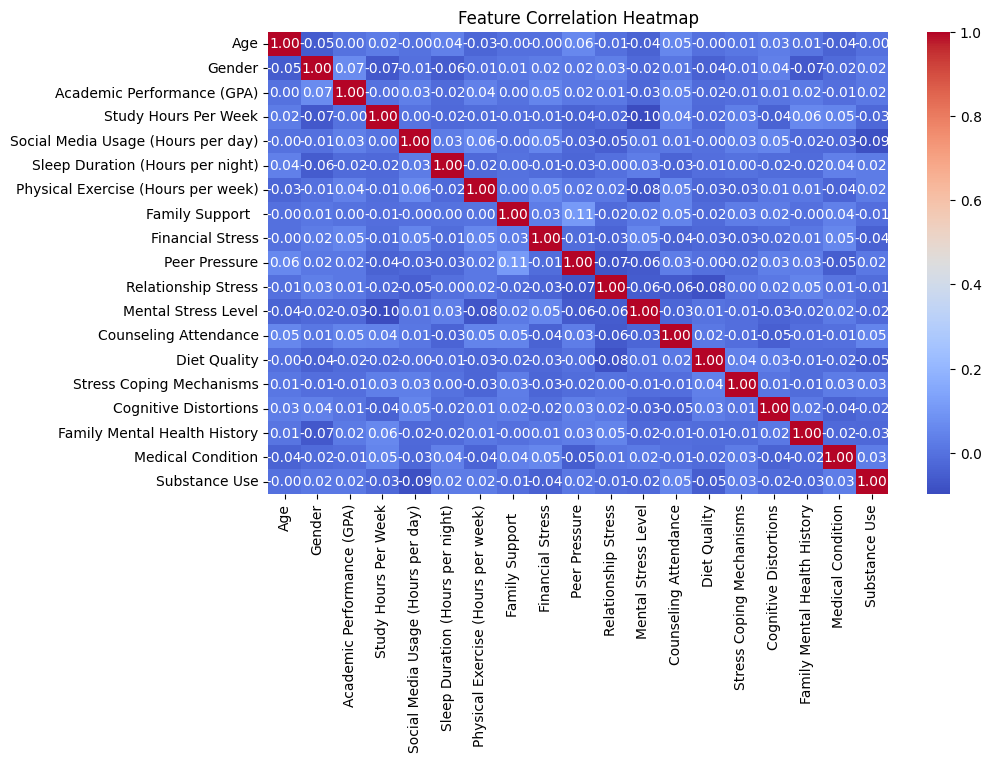

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [23]:
threshold = df['Mental Stress Level'].median()  # You can adjust this threshold as needed
df['Mental Stress Level'] = (df['Mental Stress Level'] > threshold).astype(int)

# Extract features and target variable
X = df.drop('Mental Stress Level', axis=1)
y = df['Mental Stress Level']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
pred_log_reg = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, pred_log_reg)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, pred_rf)

# Support Vector Machine (SVM)
svm = SVC()
svm.fit(X_train, y_train)
pred_svm = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, pred_svm)

In [24]:
print(f"Logistic Regression Accuracy: {log_reg_accuracy:.2f}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"SVM Accuracy: {svm_accuracy:.2f}")

Logistic Regression Accuracy: 0.48
Random Forest Accuracy: 0.51
SVM Accuracy: 0.48


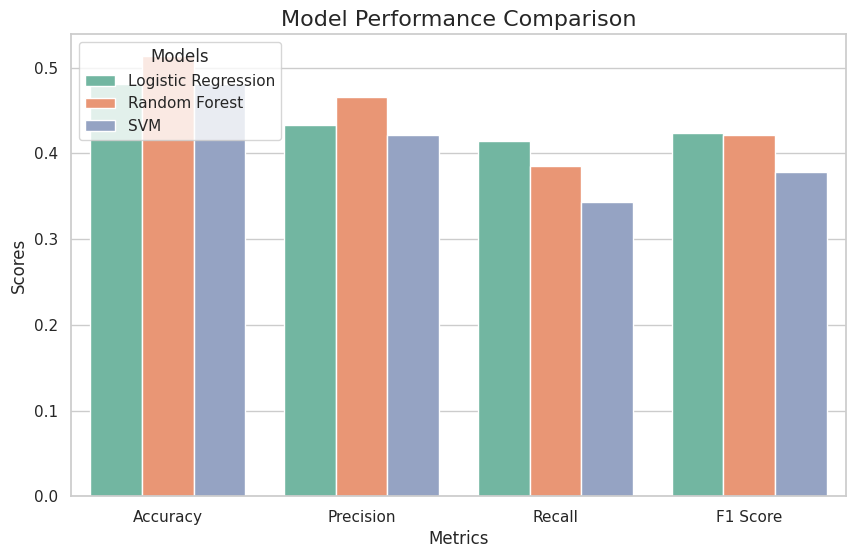

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

log_reg_accuracy = accuracy_score(y_test, pred_log_reg)
log_reg_precision = precision_score(y_test, pred_log_reg)
log_reg_recall = recall_score(y_test, pred_log_reg)
log_reg_f1 = f1_score(y_test, pred_log_reg)

rf_accuracy = accuracy_score(y_test, pred_rf)
rf_precision = precision_score(y_test, pred_rf)
rf_recall = recall_score(y_test, pred_rf)
rf_f1 = f1_score(y_test, pred_rf)

svm_accuracy = accuracy_score(y_test, pred_svm)
svm_precision = precision_score(y_test, pred_svm)
svm_recall = recall_score(y_test, pred_svm)
svm_f1 = f1_score(y_test, pred_svm)

# Creating DataFrame for Seaborn plotting
data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Logistic Regression': [log_reg_accuracy, log_reg_precision, log_reg_recall, log_reg_f1],
    'Random Forest': [rf_accuracy, rf_precision, rf_recall, rf_f1],
    'SVM': [svm_accuracy, svm_precision, svm_recall, svm_f1]
}

df_metrics = pd.DataFrame(data)

# Melt the DataFrame for easy plotting in Seaborn
df_melted = df_metrics.melt(id_vars='Metric', var_name='Model', value_name='Score')

# Set the figure size
plt.figure(figsize=(10, 6))

# Seaborn barplot with advanced styling
sns.set(style="whitegrid")
sns.barplot(x='Metric', y='Score', hue='Model', data=df_melted, palette="Set2")

# Adding title and labels
plt.title('Model Performance Comparison', fontsize=16)
plt.ylabel('Scores', fontsize=12)
plt.xlabel('Metrics', fontsize=12)
plt.legend(title='Models', loc='upper left')

# Display the plot
plt.show()

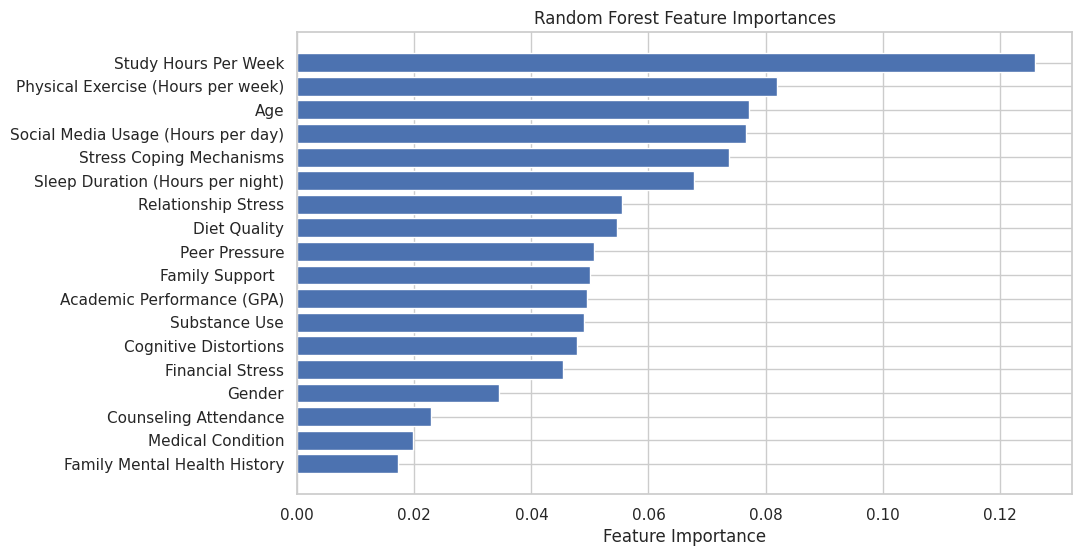

In [30]:
from sklearn.decomposition import PCA
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
importances = rf.feature_importances_
indices = importances.argsort()

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Random Forest Feature Importances")
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), X_train.columns[indices])
plt.xlabel("Feature Importance")
plt.show()

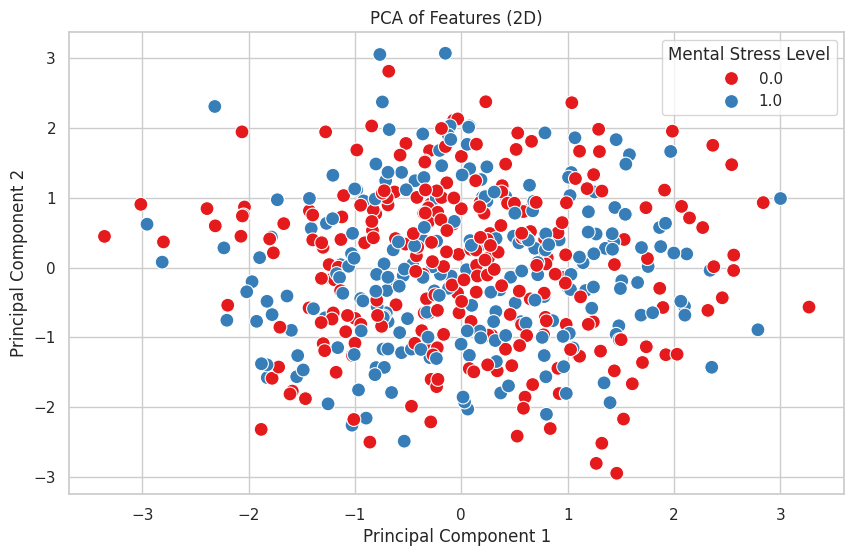

In [32]:
X_scaled = scaler.fit_transform(X_train)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for PCA results
df_pca = pd.DataFrame(X_pca, columns=["PCA 1", "PCA 2"])
df_pca['Mental Stress Level'] = y_train

# Plot PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PCA 1", y="PCA 2", hue="Mental Stress Level", data=df_pca, palette="Set1", edgecolor='w', s=100)
plt.title('PCA of Features (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [38]:
hypothesized_mean = 5
mental_stress = df['Mental Stress Level']
# Calculate sample mean and standard deviation
sample_mean = np.mean(mental_stress)
sample_std = np.std(mental_stress, ddof=1)
sample_size = len(mental_stress)
standard_error = sample_std / np.sqrt(sample_size)
import scipy.stats as stats
# Perform the T-test
t_statistic, t_p_value = stats.ttest_1samp(mental_stress, hypothesized_mean)

# --- Z-Test ---
# Assume population standard deviation (for example, 1 here)
population_std = 1

# Calculate Z-statistic
z_statistic = (sample_mean - hypothesized_mean) / (population_std / np.sqrt(sample_size))

# Calculate p-value for Z-test
z_p_value = 2 * (1 - stats.norm.cdf(abs(z_statistic)))  # Two-tailed test

# --- Interpret Results ---
alpha = 0.05  # Significance level

# T-test interpretation
print(f"T-test statistic: {t_statistic}")
print(f"T-test p-value: {t_p_value}")

# Z-test interpretation
print(f"Z-test statistic: {z_statistic}")
print(f"Z-test p-value: {z_p_value}")

# Interpretation for T-test
if t_p_value < alpha:
    print("T-test: Reject the null hypothesis. The sample mean is significantly different from 5.")
else:
    print("T-test: Fail to reject the null hypothesis. The sample mean is not significantly different from 5.")

# Interpretation for Z-test
if z_p_value < alpha:
    print("Z-test: Reject the null hypothesis. The sample mean is significantly different from 5.")
else:
    print("Z-test: Fail to reject the null hypothesis. The sample mean is not significantly different from 5.")

T-test statistic: -249.7457373676943
T-test p-value: 0.0
Z-test statistic: -124.781915018922
Z-test p-value: 0.0
T-test: Reject the null hypothesis. The sample mean is significantly different from 5.
Z-test: Reject the null hypothesis. The sample mean is significantly different from 5.


In [40]:
feature_importances = rf.feature_importances_
features = X.columns

# Sort feature importance
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort and get top 3 features
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(3)
print("Top 3 Features Influencing Mental Stress Level:")
print(top_features)

Top 3 Features Influencing Mental Stress Level:
                              Feature  Importance
3                Study Hours Per Week    0.126116
6  Physical Exercise (Hours per week)    0.082010
0                                 Age    0.077096


In [43]:
contingency_table = pd.crosstab(df['Gender'], df['Counseling Attendance'])
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2_stat}")
print(f"Chi-square p-value: {p_value}")
if p_value < 0.05:
    print("Chi-square: Reject the null hypothesis. There is a significant relationship between gender and counseling attendance.")
else:
    print("Chi-square: Fail to reject the null hypothesis. There is no significant relationship between gender and counseling attendance.")

Chi-square statistic: 8.910304885158673
Chi-square p-value: 0.25916012793906545
Chi-square: Fail to reject the null hypothesis. There is no significant relationship between gender and counseling attendance.
